# Importing Required Libraries


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Importing Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape : ", X_train.shape)
print("Training labels shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing labels shape : ", y_test.shape)


11490434/11490434 [==============================] - 3s 0us/step

Training data shape :  (60000, 28, 28)

Training labels shape :  (60000,)

Testing data shape :  (10000, 28, 28)

Testing labels shape :  (10000,)


In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Constants

In [5]:
n_classes = 10
epochs = 10
fine_label_list = ['0','1','2','3','4','5','6','7','8','9']
input_shape = (28,28)

# Preprocessing

In [6]:
def unison_shuffled_copies(a, b):
  randomize = np.arange(len(a))
  np.random.shuffle(randomize)
  x = a[randomize]
  y = b[randomize]
  return x, y

# Shuffling dataset
X_train, y_train = unison_shuffled_copies(X_train, y_train)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Visualizing Dataset

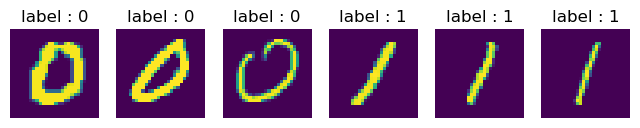

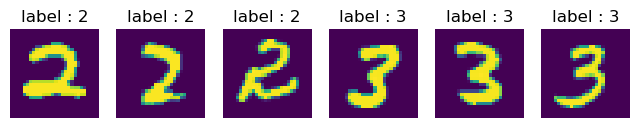

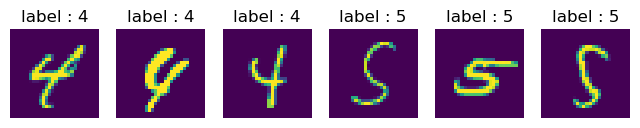

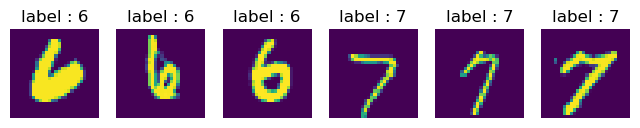

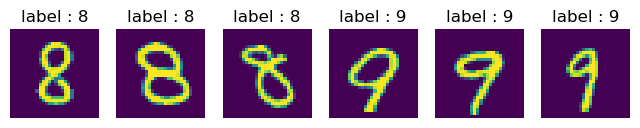

In [7]:
num_classes= 10 # Number of classes visualized
num_samples= 3 # Number of samples from each class
class_plotted = [int(i) for i in fine_label_list]

for i in range(0,10,2):
    image_samples = X_train[y_train.reshape(-1) == class_plotted[i]][:num_samples]
    fig, ax1 = plt.subplots(nrows = 1, ncols = num_samples*2, figsize=(8,2) )
    #fig.suptitle("label : %d   label : %d" % (class_plotted[i],
    #                                          class_plotted[i+1]))
    for j in range(num_samples):
        ax1[j].imshow(image_samples[j])
        ax1[j].set_title("label : %d" %(class_plotted[i]))
        ax1[j].axis('off')

    image_samples = X_train[y_train.reshape(-1) == class_plotted[i+1]][:num_samples]
    for j in range(num_samples):
      ax1[num_samples+j].imshow(image_samples[j])
      ax1[num_samples+j].set_title("label : %d" %(class_plotted[i+1]))
      ax1[num_samples+j].axis('off')  

plt.show()

# Creating Network

## Single Layer Perceptron Model

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
  tf.keras.layers.Dense(n_classes, activation='softmax')
])

## Multi Layer Perceptron Model

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 5, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)),
  tf.keras.layers.MaxPool2D( pool_size=(2,2)) ,
  tf.keras.layers.Flatten(input_shape=input_shape),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(n_classes, activation='softmax')]
  )

# Compiling Network

In [11]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 28, 28, 5)         130       

                                                                 

 max_pooling2d (MaxPooling2D  (None, 14, 14, 5)        0         

 )                                                               

                                                                 

 flatten_1 (Flatten)         (None, 980)               0         

                                                                 

 dropout (Dropout)           (None, 980)               0         

                                                                 

 dense_1 (Dense)             (None, 10)                9810      

                                                                 


Total params: 9,940

Trainable params: 9,940

Non-trainable params: 0

_________________________________

# Training Model

In [12]:
history = model.fit(x=X_train ,y=y_train, epochs = epochs)

Epoch 1/10

1875/1875 [==============================] - 16s 8ms/step - loss: 1.7602 - accuracy: 0.8273

Epoch 2/10

1875/1875 [==============================] - 17s 9ms/step - loss: 0.2306 - accuracy: 0.9313

Epoch 3/10

1875/1875 [==============================] - 16s 9ms/step - loss: 0.1734 - accuracy: 0.9475

Epoch 4/10

1875/1875 [==============================] - 17s 9ms/step - loss: 0.1509 - accuracy: 0.9538

Epoch 5/10

1875/1875 [==============================] - 18s 10ms/step - loss: 0.1408 - accuracy: 0.9569

Epoch 6/10

1875/1875 [==============================] - 16s 9ms/step - loss: 0.1320 - accuracy: 0.9600

Epoch 7/10

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1282 - accuracy: 0.9621

Epoch 8/10

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1278 - accuracy: 0.9616

Epoch 9/10

1875/1875 [==============================] - 15s 8ms/step - loss: 0.1246 - accuracy: 0.9627

Epoch 10/10

1875/1875 [==============================

# Training Results

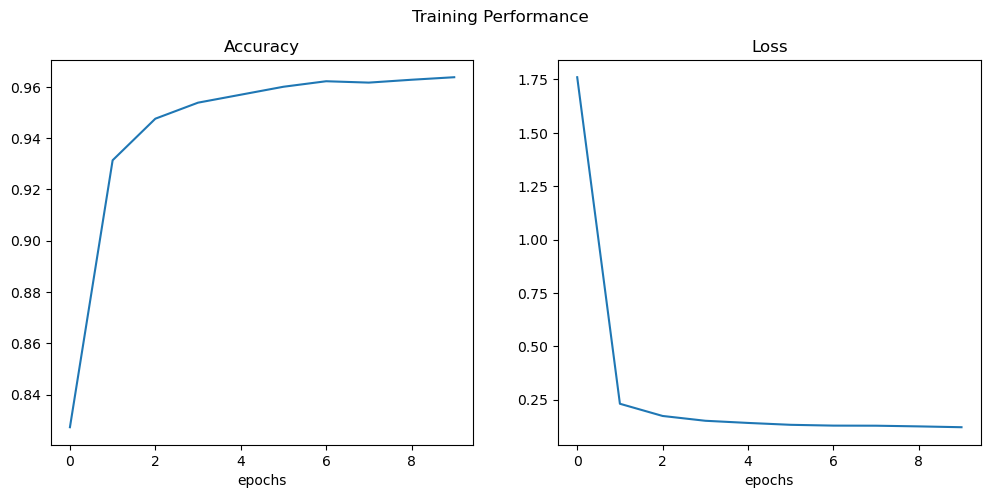

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.suptitle("Training Performance")
ax1.plot(history.history['accuracy'])
ax2.plot(history.history['loss'])
ax1.set_title("Accuracy")
ax1.set_xlabel("epochs")
ax2.set_title("Loss")
ax2.set_xlabel("epochs")

plt.show()

# Testing Model

In [14]:
y_test= y_test.reshape(-1)
y_pred = model.predict(X_test)

y_pred2=[]
for i in range(len(y_pred)):
  y_pred2.append( np.argmax(y_pred[i]) )

test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred2)
test_accuracy *=  100
print(classification_report(y_test, y_pred2))
print("Accuracy: "+str(test_accuracy)+ " %")
print('\n')

313/313 [==============================] - 1s 4ms/step

              precision    recall  f1-score   support



           0       0.97      0.99      0.98       980

           1       0.98      0.98      0.98      1135

           2       0.97      0.97      0.97      1032

           3       0.98      0.97      0.98      1010

           4       0.98      0.97      0.97       982

           5       0.97      0.98      0.98       892

           6       0.99      0.98      0.98       958

           7       0.98      0.97      0.98      1028

           8       0.96      0.95      0.95       974

           9       0.94      0.97      0.95      1009



    accuracy                           0.97     10000

   macro avg       0.97      0.97      0.97     10000

weighted avg       0.97      0.97      0.97     10000



Accuracy: 97.26 %






# Testing Metrics

In [15]:
conf_matrix = confusion_matrix(y_true= y_test, y_pred= y_pred2)
                               
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)
ACC = (TP+TN)/(TP+FP+FN+TN)

df = pd.DataFrame( { 'TP': TP.round(3)
                   , 'TN': TN.round(3)
                   , 'FN': FN.round(3)
                   , 'FP': FP.round(3)
                   , 'Acc': ACC.round(3)}
                  , index = fine_label_list  
                  )
df

,TP,TN,FN,FP,Acc
0,966,8992,14,28,0.996
1,1114,8843,21,22,0.996
2,1003,8935,29,33,0.994
3,984,8970,26,20,0.995
4,952,8999,30,19,0.995
5,873,9085,19,23,0.996
6,937,9032,21,10,0.997
7,998,8952,30,20,0.995
8,923,8989,51,37,0.991
9,976,8929,33,62,0.990


# Confusion Matrix

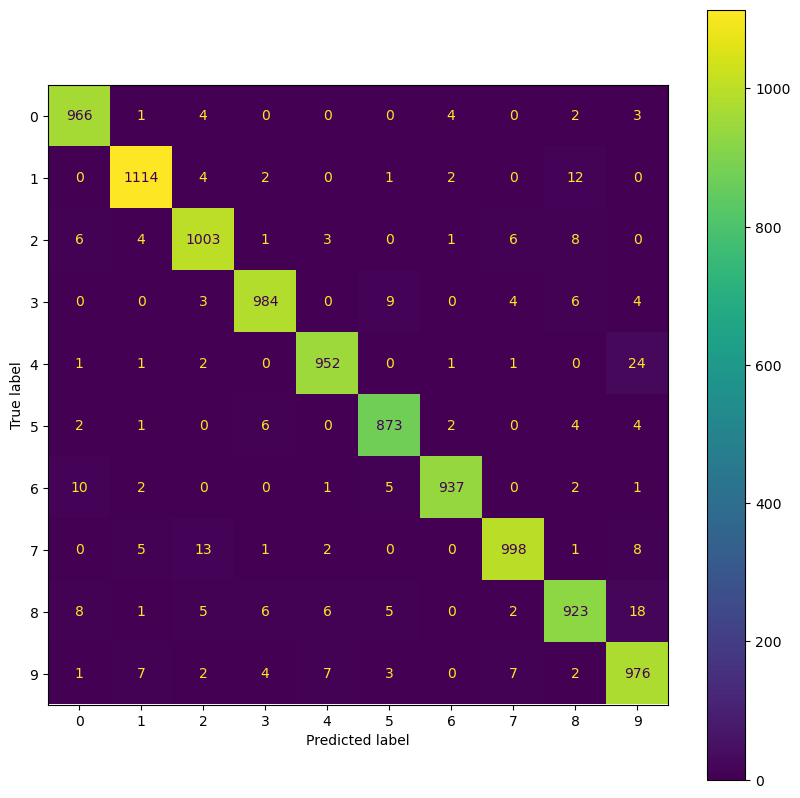

In [16]:
labels = [int(i) for i in fine_label_list]
cm = confusion_matrix(y_true = y_test, y_pred= y_pred2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

# Visualizing Tests

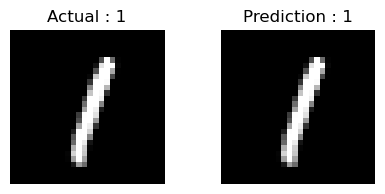

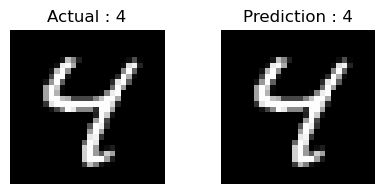

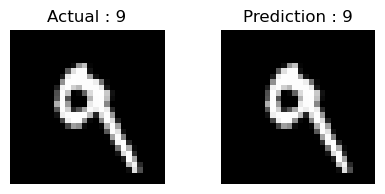

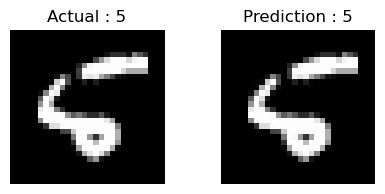

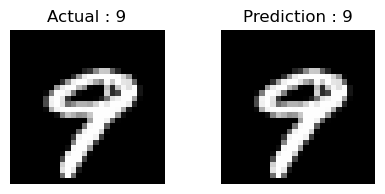

In [17]:
n_tests = 5
start = 5
image = X_test[start: start + n_tests]
labels = y_test[start: start + n_tests]
pred = y_pred2[start: start + n_tests]

for i in range(len(labels)):
  fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(5, 2))

  ax1.axis('off')
  ax1.imshow(image[i] , cmap=plt.cm.gray)
  ax1.set_title("Actual : " + str(fine_label_list[int(labels[i]) ]) )
  ax2.axis('off')
  ax2.imshow(image[i], cmap=plt.cm.gray)
  ax2.set_title('Prediction : '+ str( fine_label_list[int(pred[i] )] ))

plt.show()